# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

import warnings
warnings.filterwarnings('ignore')


In [2]:
data =pd.read_csv('car_price_prediction.csv')

# Explore Data🔎 and Data Cleaning 🧹

In [3]:
data.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
data.shape

(19237, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
# Check Duplication
data.duplicated().sum()

313

- There are duplicate values
- It must be Droped

In [7]:
# drop duplicate values
data.drop_duplicates(inplace= True)

In [8]:
# check Missing value
data.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

- No Missing Value is avalible

In [9]:
# Check the number of unique values of each column
data.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

In [10]:
# Check statistic of dataset
data.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


### Let's start checking the unique values for each column

In [11]:
for col in data.columns:
    print(f'Category in {col} is :\n {data[col].unique()}\n')
    print('\\'*50)

Category in ID is :
 [45654403 44731507 45774419 ... 45804997 45793526 45813273]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Price is :
 [13328 16621  8467 ... 56814 63886 22075]

\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
Category in Levy is :
 ['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'


- Dropping the ID and Doors columns which will not provide any information for our model

In [12]:
data=data.drop(['ID','Doors'],axis=1)

### Levy

- we need to replacing '-' with 0, to convert the type of this column to float

In [13]:
# Replacing '-' with 0
data['Levy']=data['Levy'].replace('-','0')

# Converting Levy type to float
data['Levy'] = data['Levy'].astype('float64')

### Prod. year

- Prod. year column is not useful, so we will drop or replace it with Age column

In [14]:
dtime = dt.datetime.now()
data['Age']=dtime.year - data['Prod. year']

In [15]:
data = data.drop('Prod. year',axis=1)

In [16]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,4,9


### Mileage

- we need to strip 'km' in them, and convert the type of this column to integer

In [17]:
# Replacing 'Km' with ''  
data['Mileage'] =data['Mileage'].str.replace('km',"")

# Converting Mileage type to int64
data.Mileage = data.Mileage.astype('Int64')

In [18]:
data.Mileage.head()

0    186005
1    192000
2    200000
3    168966
4     91901
Name: Mileage, dtype: Int64

### Engine volume

- we need to strip the 'turbo' word in them, and convert it's type to float 

In [19]:
# Replacing 'Turbo' with '' 
data['Engine volume'] = data['Engine volume'].str.replace('Turbo','')

# Converting Levy type to float
data['Engine volume'] = data['Engine volume'].astype('float64')

In [20]:
data['Engine volume'].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

### Let's check the last version of our dataset after our processing.

In [21]:
data.head()

,Price,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags,Age
0,13328,1399.0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,Left wheel,Silver,12,13
1,16621,1018.0,CHEVROLET,Equinox,Jeep,No,Petrol,3.0,192000,6.0,Tiptronic,4x4,Left wheel,Black,8,12
2,8467,0.0,HONDA,FIT,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,Right-hand drive,Black,2,17
3,3607,862.0,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,Left wheel,White,0,12
4,11726,446.0,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,Left wheel,Silver,4,9


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18924 entries, 0 to 19236
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             18924 non-null  int64  
 1   Levy              18924 non-null  float64
 2   Manufacturer      18924 non-null  object 
 3   Model             18924 non-null  object 
 4   Category          18924 non-null  object 
 5   Leather interior  18924 non-null  object 
 6   Fuel type         18924 non-null  object 
 7   Engine volume     18924 non-null  float64
 8   Mileage           18924 non-null  Int64  
 9   Cylinders         18924 non-null  float64
 10  Gear box type     18924 non-null  object 
 11  Drive wheels      18924 non-null  object 
 12  Wheel             18924 non-null  object 
 13  Color             18924 non-null  object 
 14  Airbags           18924 non-null  int64  
 15  Age               18924 non-null  int64  
dtypes: Int64(1), float64(3), int64(3), object(9)


# Analysis📝 & Visualiation📊

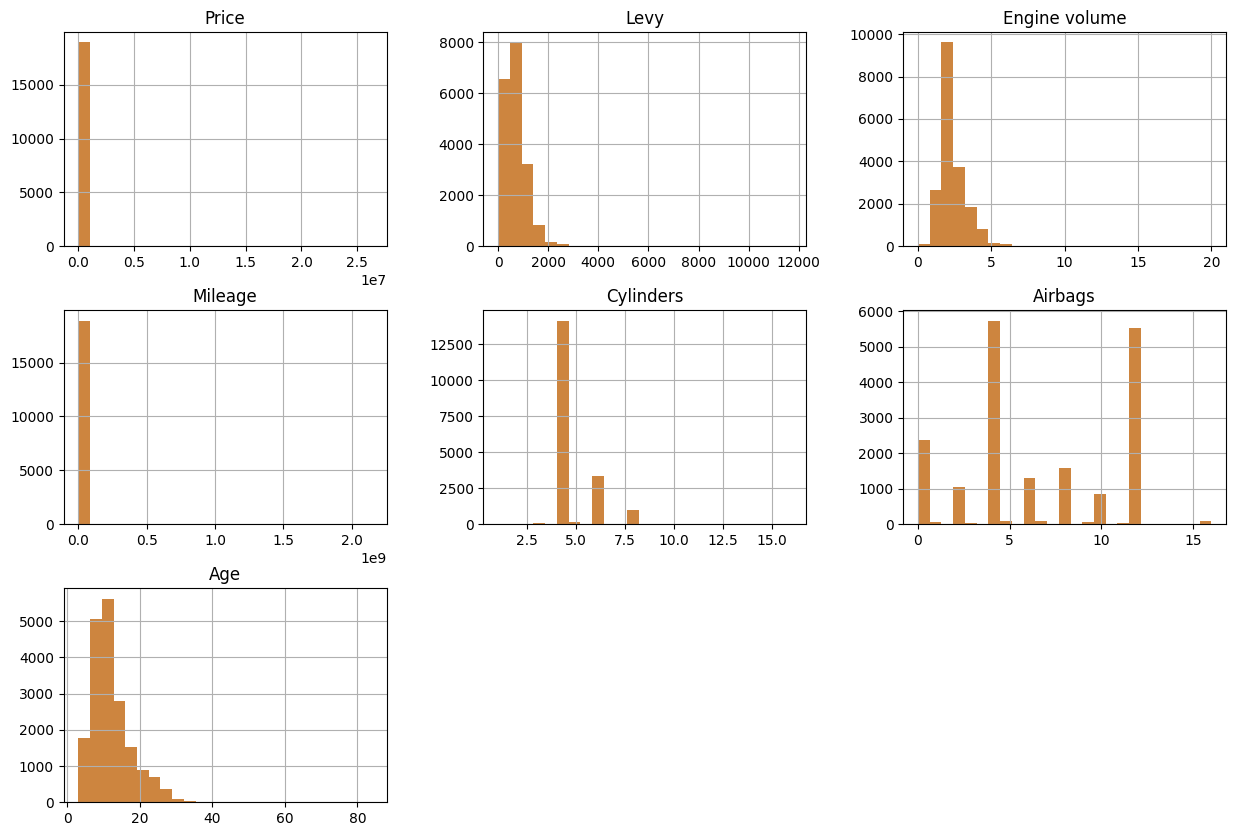

In [23]:
data.hist(bins=25,figsize=(15,10),color='peru')
plt.show()

### we found:🔎

1- in Levy column: Most values between more than 0 and less than 2000

2- Most Engine valume in range (1 to 5)

3- Mileage for most cars are 0.0 (most cars are new)

4- in Airbags column: Most cars have 3 to 5 airbags or 13 airbags

5- in Age column: Most cars are 13 years old, but we have some very old cars

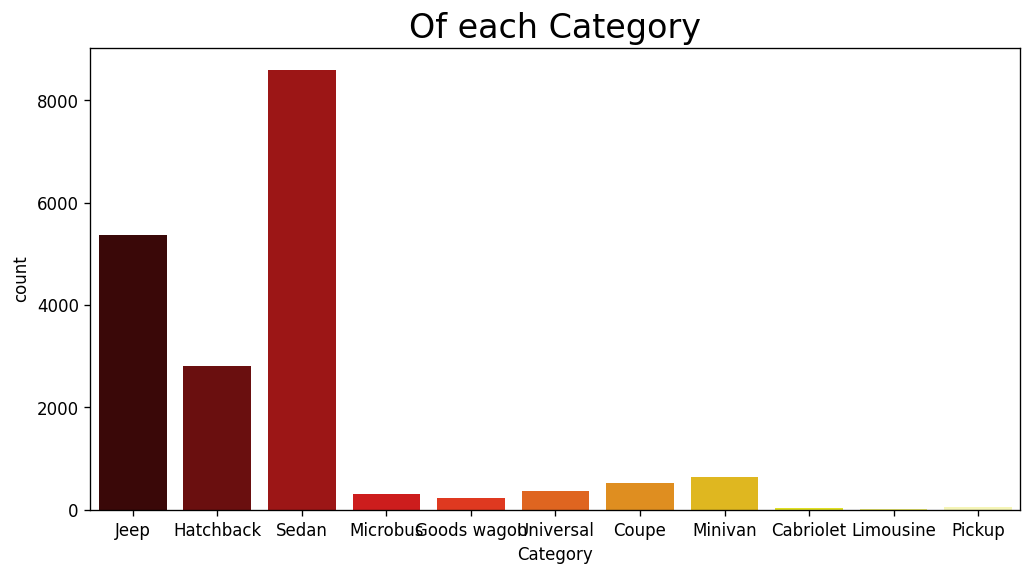

In [24]:
plt.subplots(figsize=(10,5), dpi=120)
sns.countplot(data= data, x='Category',palette='hot')
plt.title("Of each Category",fontsize=20)
plt.show()

Most types of Categories are Sedan, Hatchback, and Jeep.

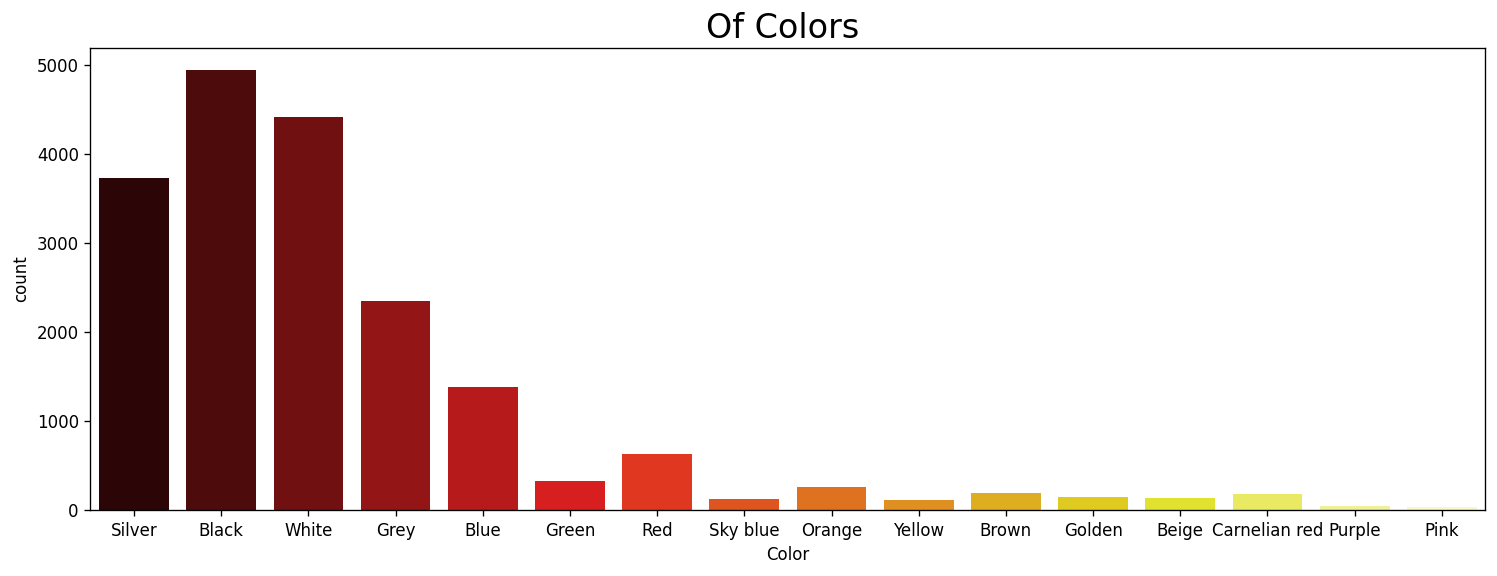

In [25]:
plt.subplots(figsize=(15,5), dpi=120)
sns.countplot(data= data, x='Color',palette='hot')
plt.title("Of Colors ",fontsize=20)
plt.show()

- The most sold car colors are Black, Silver,White and Grey.

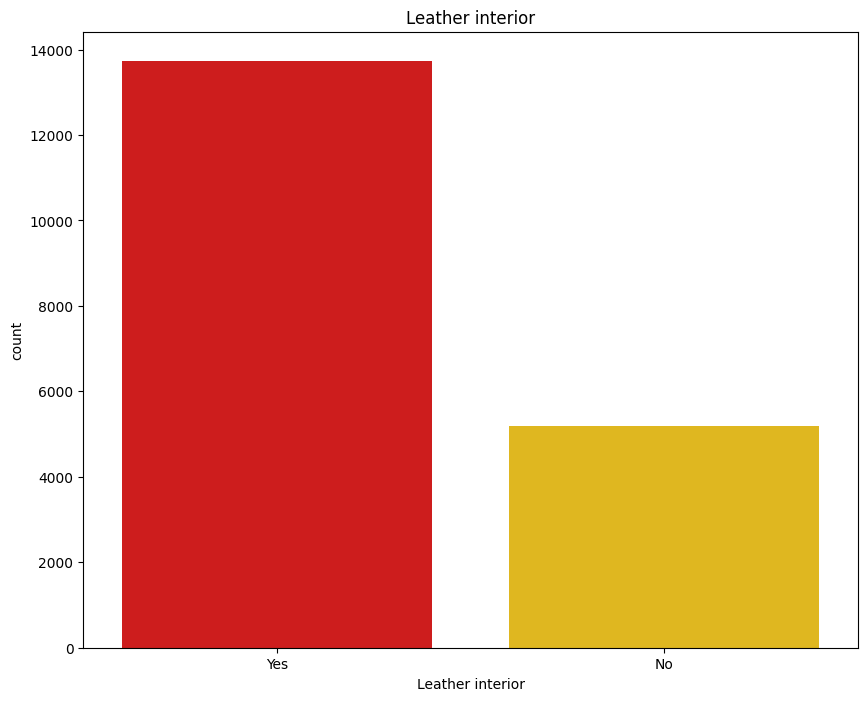

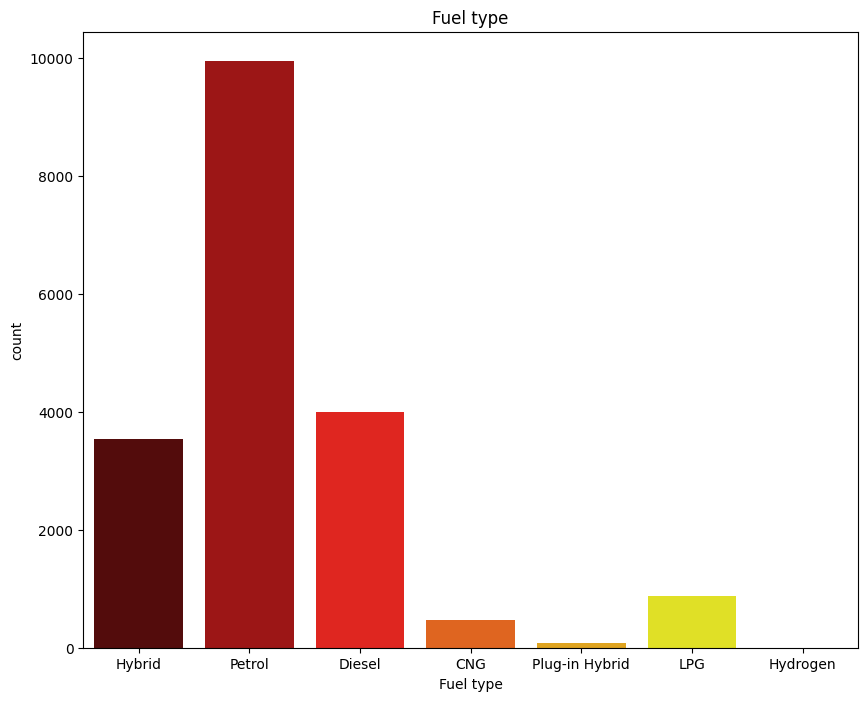

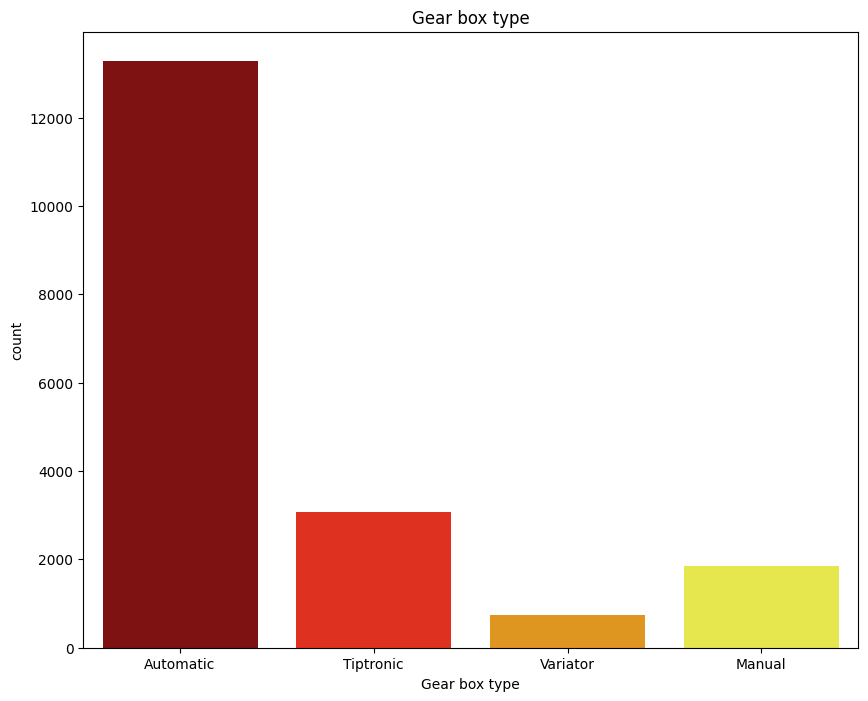

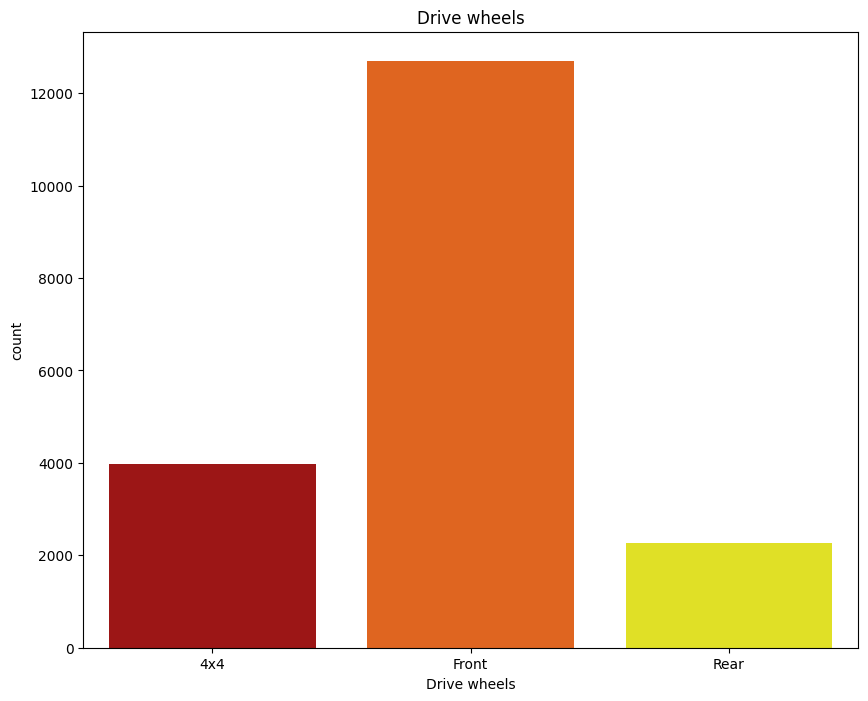

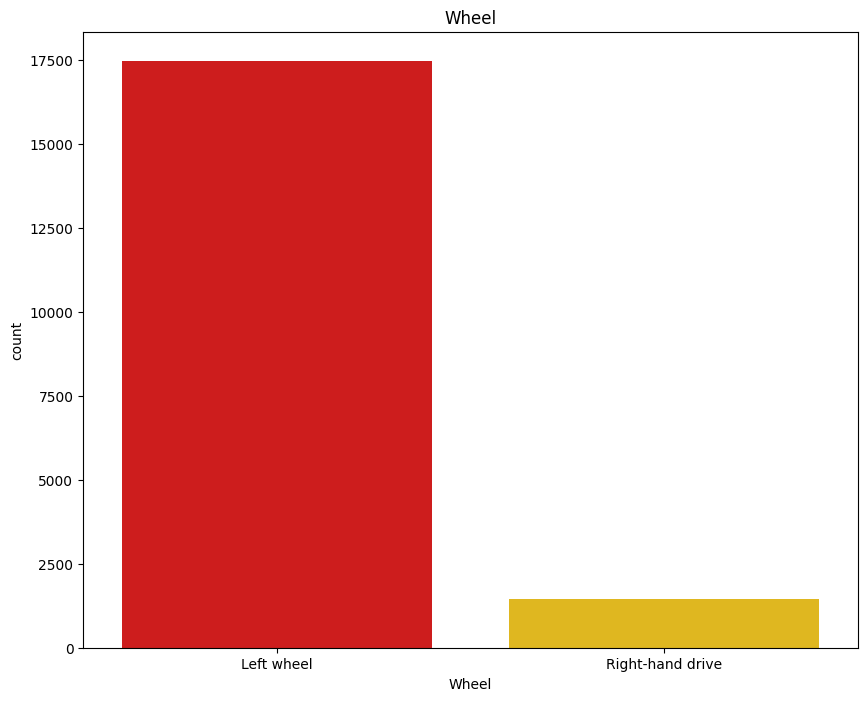

In [26]:
columns =['Leather interior','Fuel type','Gear box type','Drive wheels','Wheel']
for col in columns:
    plt.figure(figsize=(10,8))
    #top10 = data[col].value_counts()[:10]
    sns.countplot(data=data,x=col,palette='hot')
    plt.title(col)
    plt.show()

In [27]:
top_10_cars = data.Manufacturer.value_counts().sort_values(ascending=False)[:10]
top_10_cars

Manufacturer
HYUNDAI          3729
TOYOTA           3606
MERCEDES-BENZ    2043
FORD             1088
CHEVROLET        1047
BMW              1036
HONDA             960
LEXUS             927
NISSAN            645
VOLKSWAGEN        571
Name: count, dtype: int64

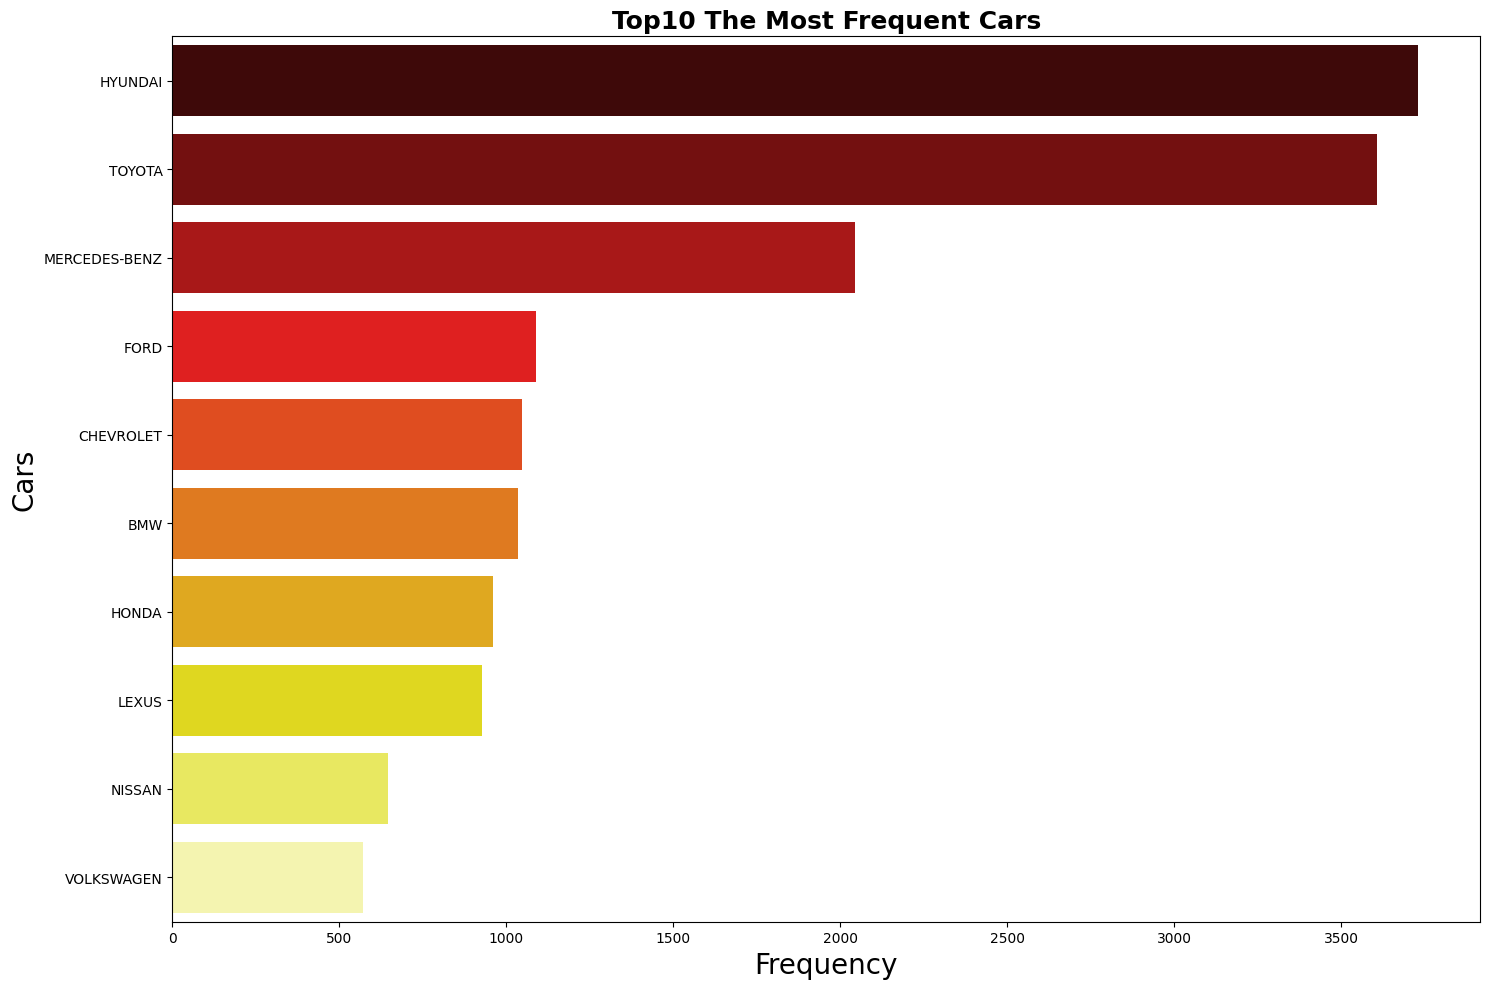

In [28]:
plt.figure(figsize=(15, 10))
sns.barplot(x=top_10_cars, y=top_10_cars.index,palette='hot',linewidth = 4)
plt.title('Top10 The Most Frequent Cars',loc='center',fontweight='bold',fontsize=18)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

In [29]:
# Calculate average price for top 10 cars 
top_10_cars_means_prices = [data[data['Manufacturer']==i]['Price'].mean() for i in list(top_10_cars.index)]


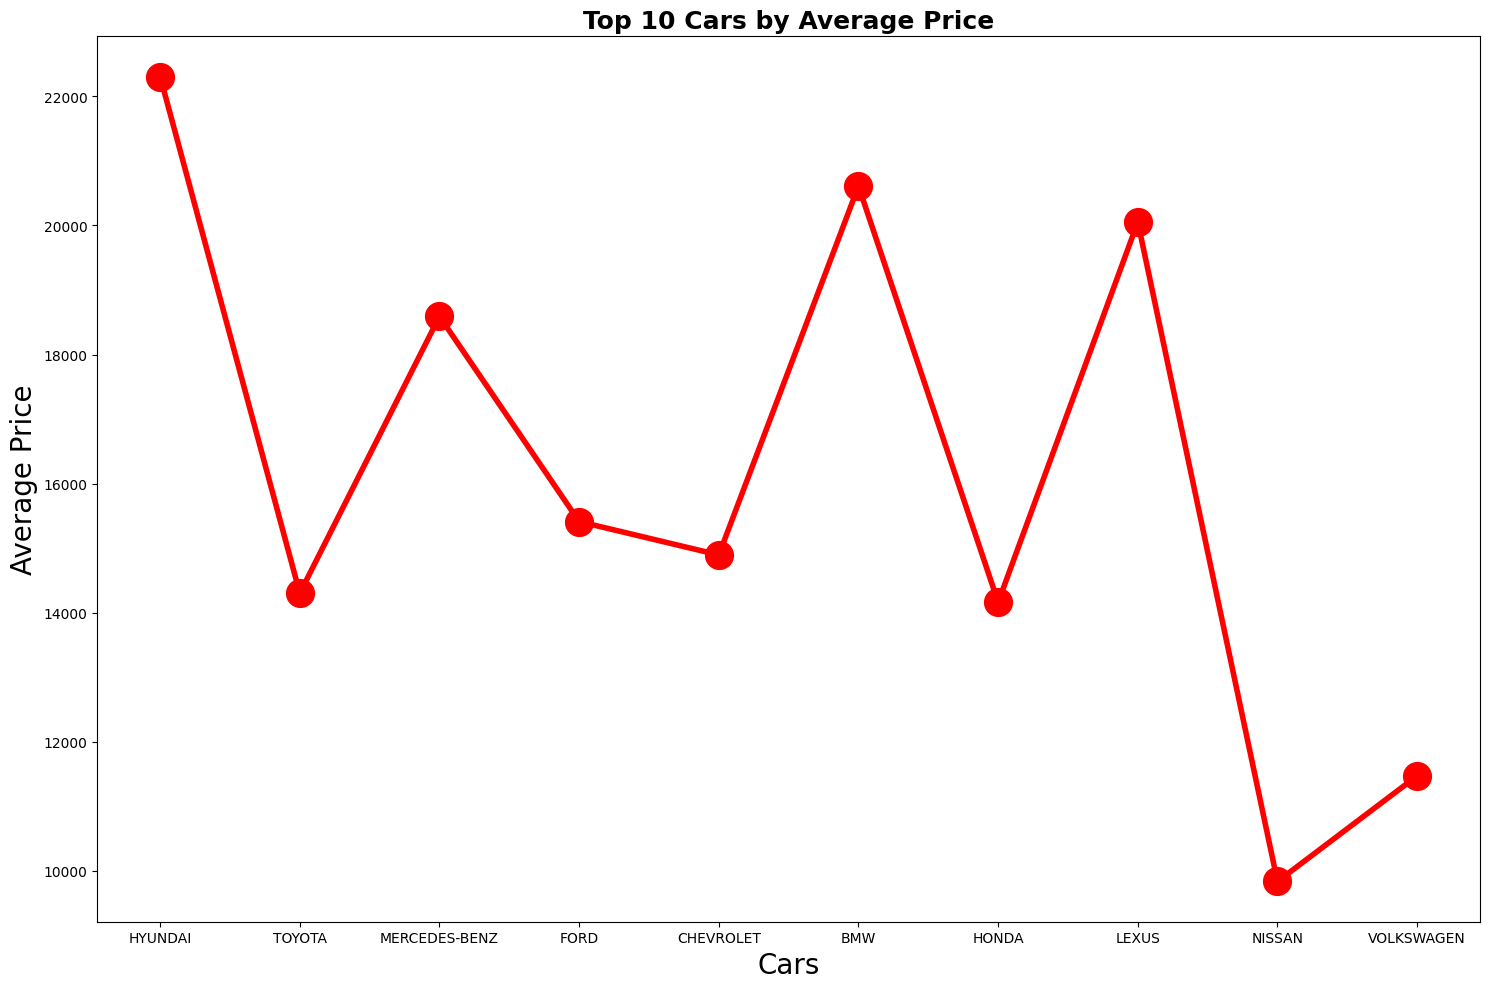

In [30]:
plt.figure(figsize=(15,10))
plt.plot(top_10_cars.index,top_10_cars_means_prices,color='r',
         linewidth = 4,marker='o',markersize = 20)
plt.title('Top 10 Cars by Average Price',loc='center',fontweight='bold',fontsize=18)
plt.ylabel('Average Price',fontsize=20)
plt.xlabel('Cars',fontsize=20)
plt.tight_layout()
plt.show()

<Axes: xlabel='Price', ylabel='Levy'>

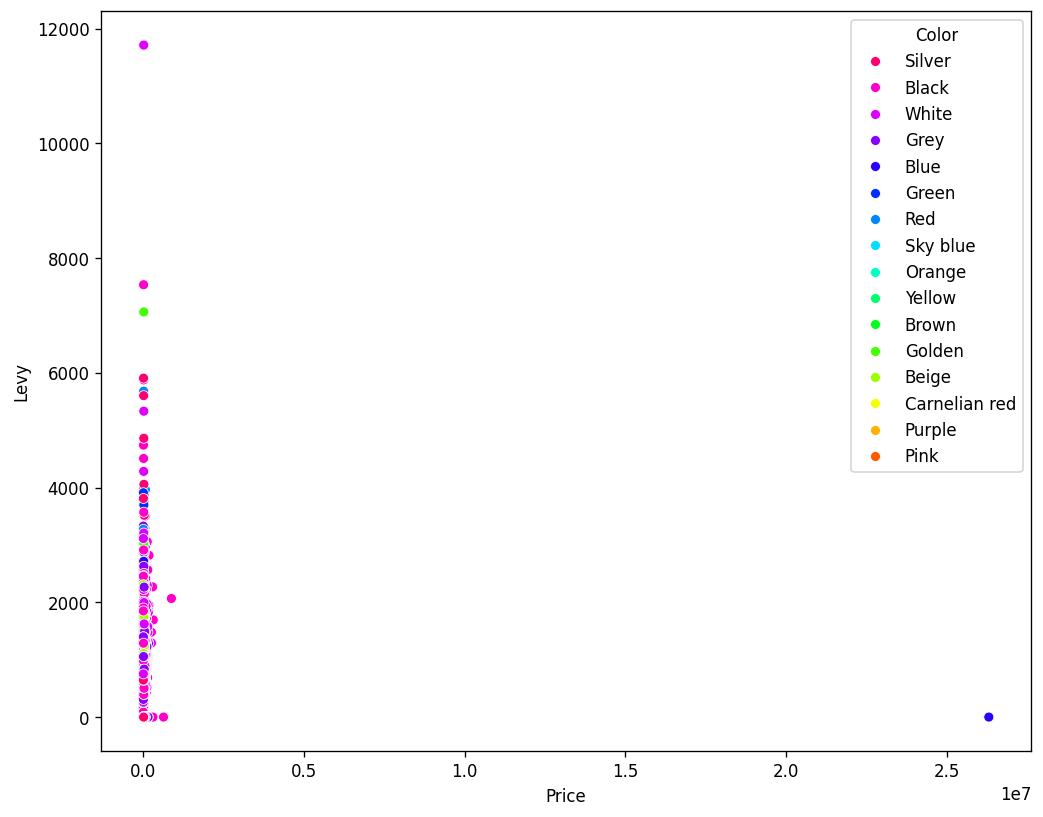

In [31]:
plt.figure(figsize=(10, 8), dpi=120)
sns.scatterplot(data=data, x='Price', y='Levy', hue="Color", palette="hsv_r")

- Color doesn't affect on car's price

In [32]:
# Correlation Analysis
cor= data.select_dtypes(exclude=object).corr()
cor

,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
Price,1.000000,-0.003558,0.008888,-0.001763,0.007435,-0.012709,-0.012689
Levy,-0.003558,1.000000,0.378117,-0.021203,0.251632,0.125015,-0.362827
Engine volume,0.008888,0.378117,1.000000,-0.006292,0.777228,0.221991,0.032427
Mileage,-0.001763,-0.021203,-0.006292,1.000000,-0.001720,-0.009174,0.064058
Cylinders,0.007435,0.251632,0.777228,-0.001720,1.000000,0.174112,0.099443
Airbags,-0.012709,0.125015,0.221991,-0.009174,0.174112,1.000000,-0.235160
Age,-0.012689,-0.362827,0.032427,0.064058,0.099443,-0.235160,1.000000


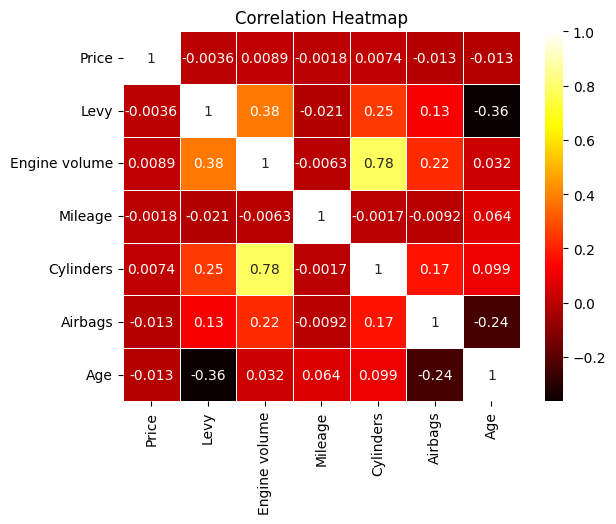

In [33]:
sns.heatmap(cor, annot= True, linewidths= 0.5,cmap='hot')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

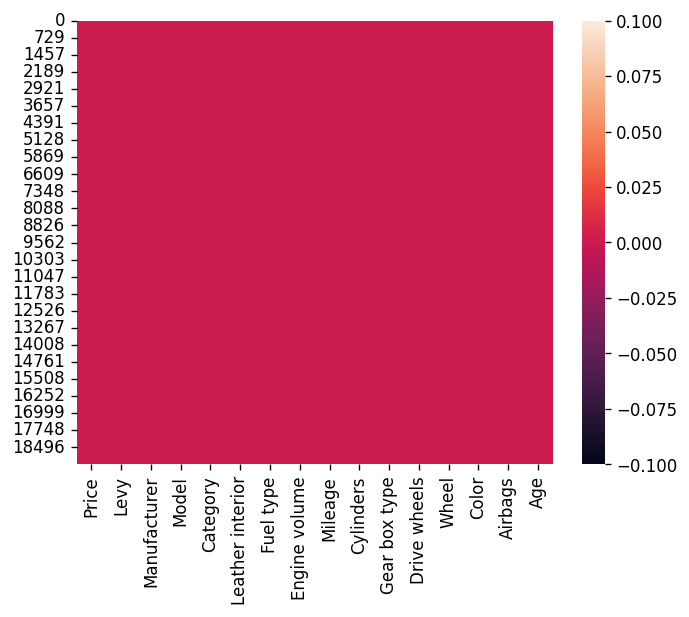

In [34]:
plt.figure(dpi=120)
sns.heatmap(data.isna())

- No Missing Value is avalible

### Detect OutLier

In [35]:
# Lets define the numeric columns
numeric_data = data.select_dtypes(exclude=object)


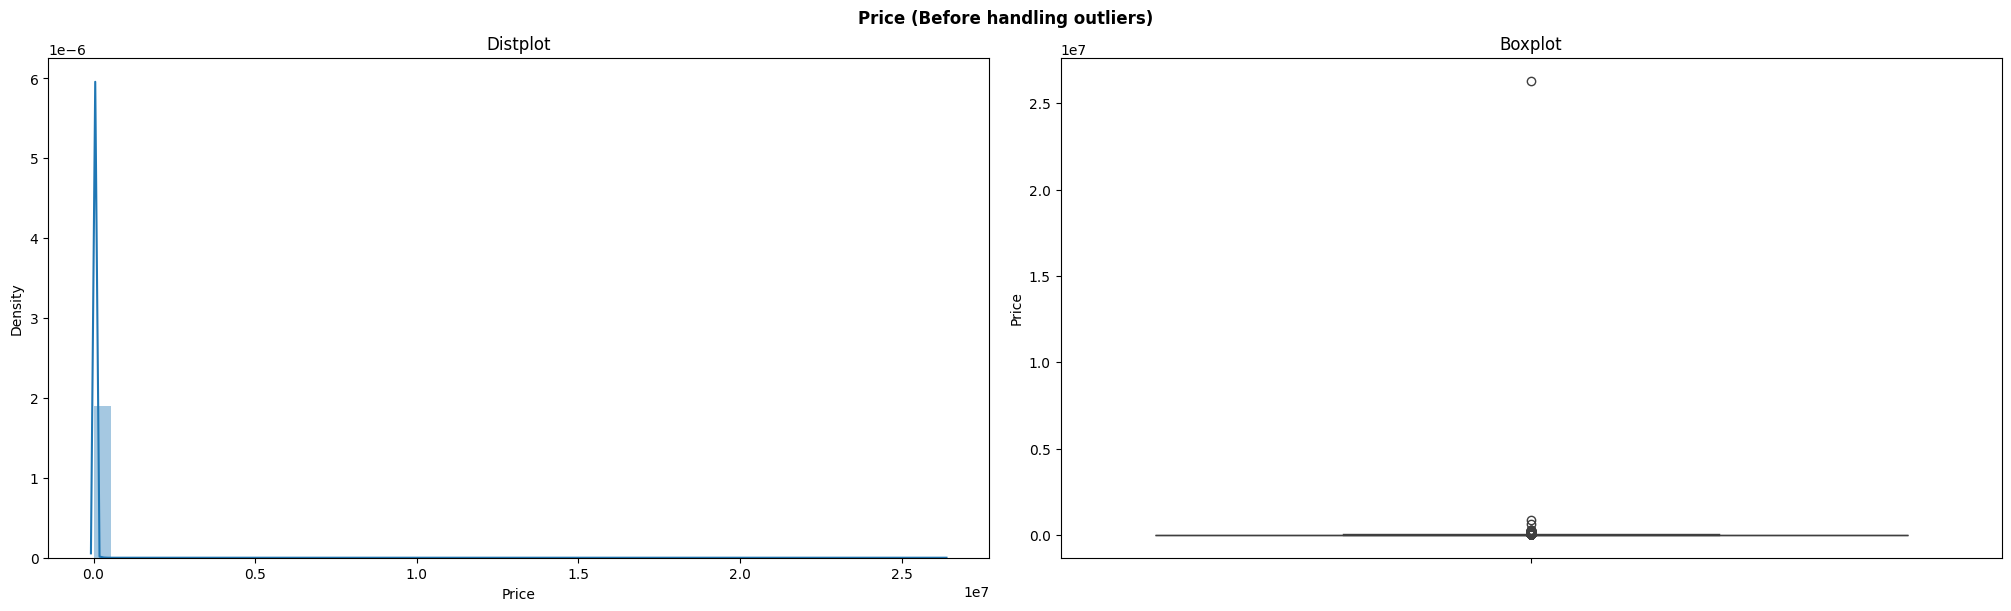

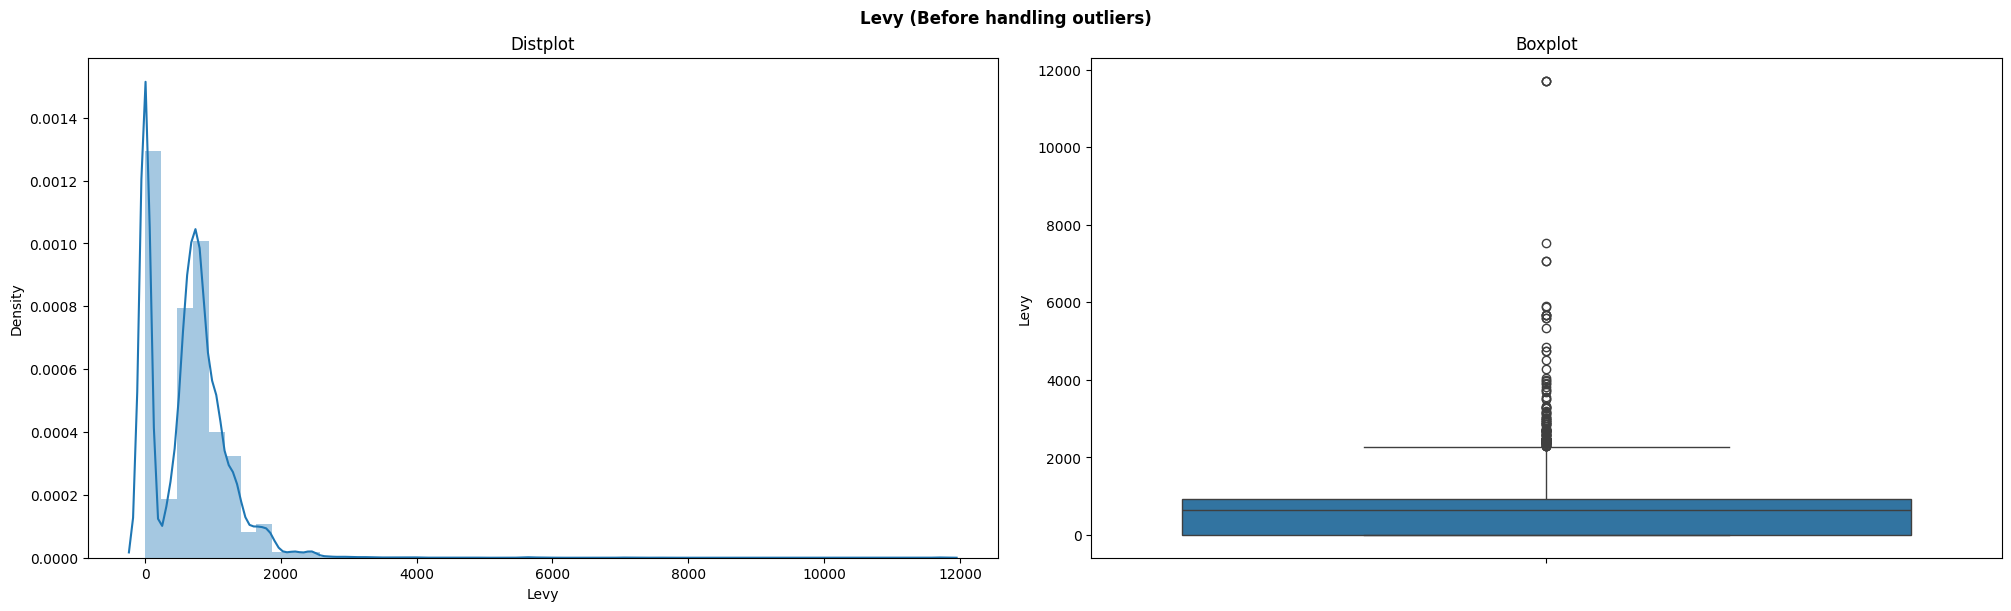

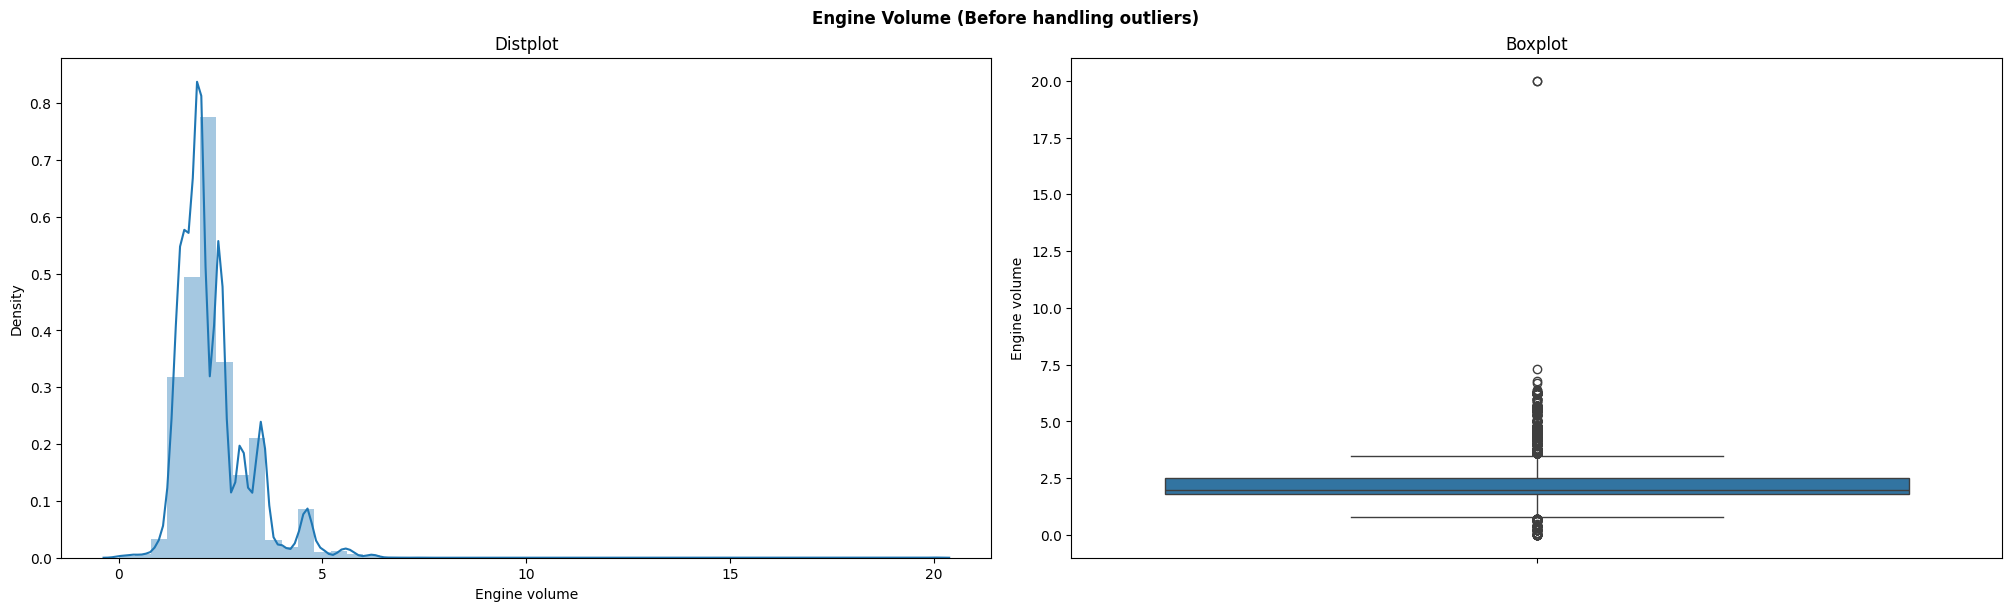

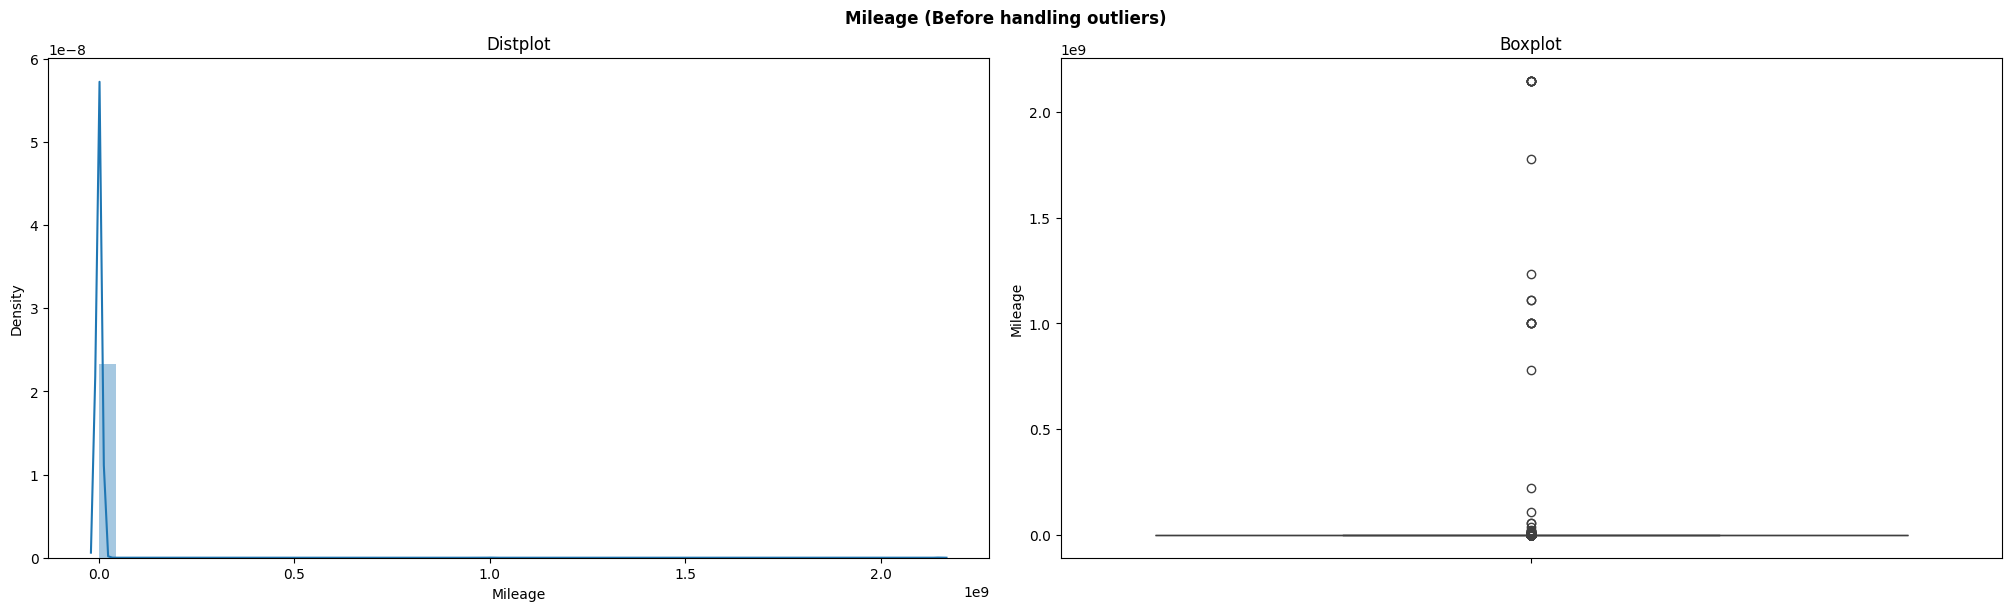

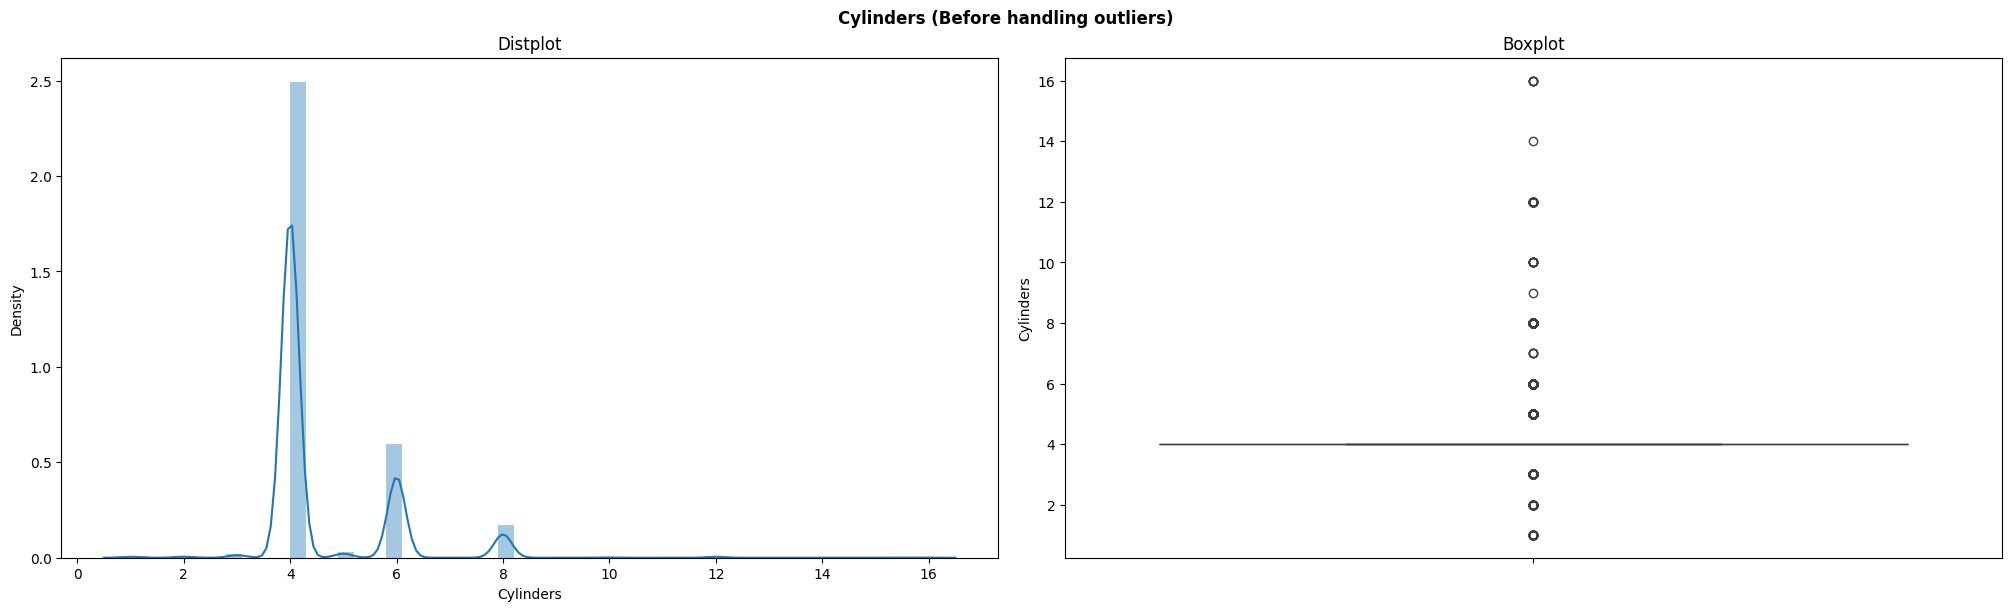

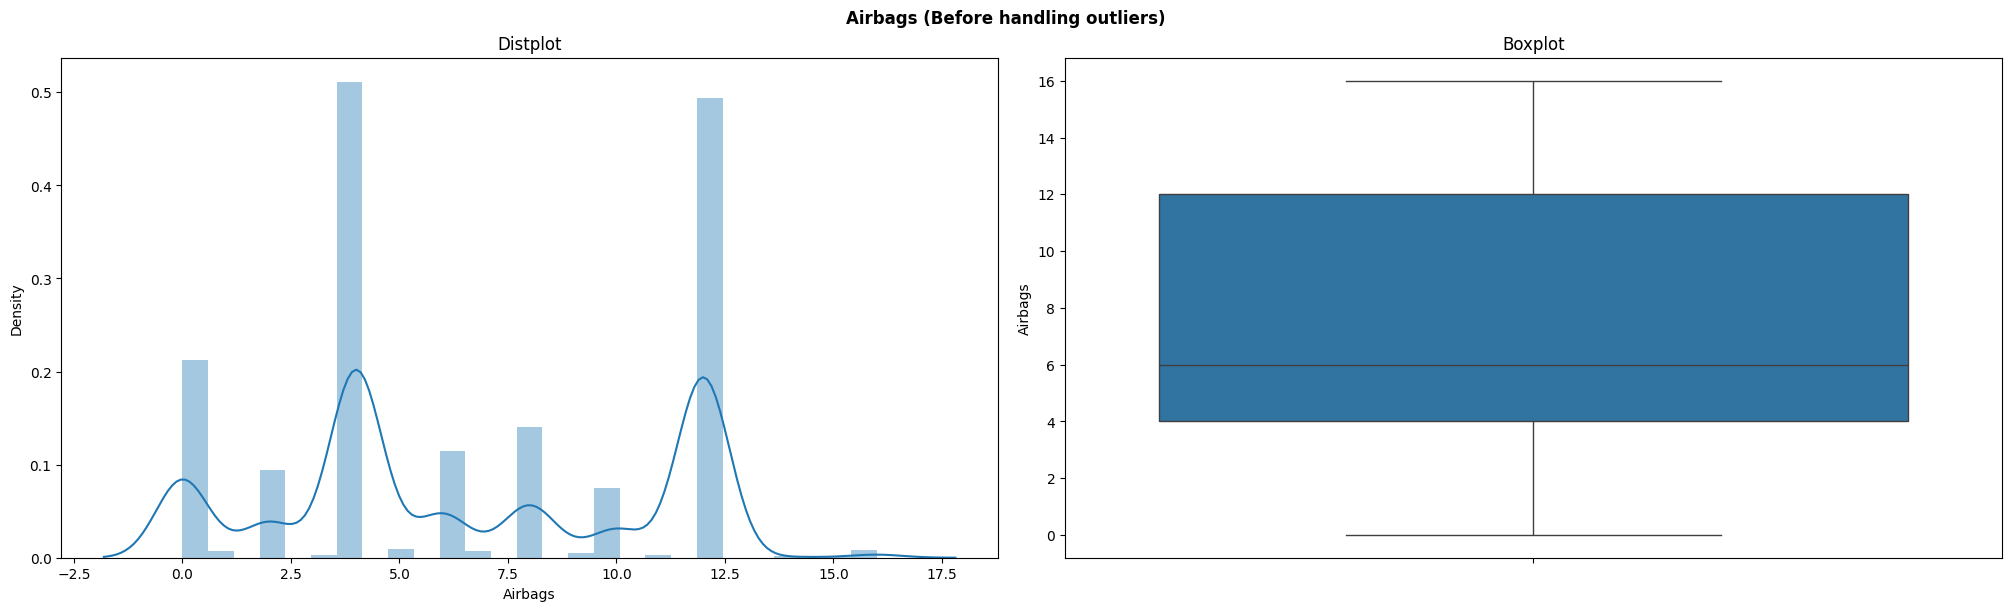

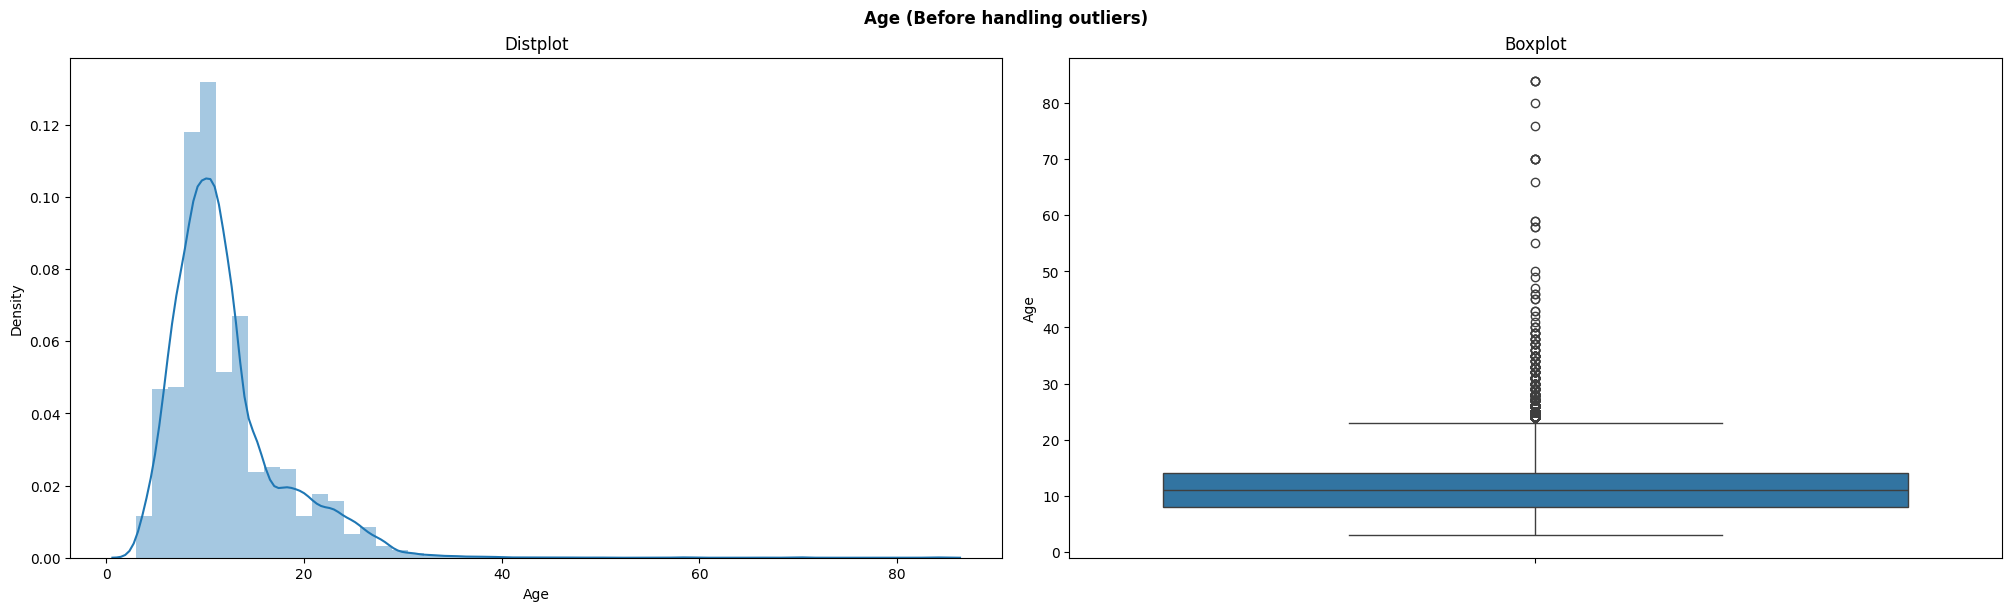

In [36]:
#Plotting Graphs Before treating outliers of continous features
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

In [37]:
for col in numeric_data:
    q1 = data[col].quantile(0.75)
    q2 = data[col].quantile(0.25)
    iq = q1 - q2
    
    low = q2-1.5*iq
    high = q1-1.5*iq
    outlier = ((numeric_data[col]>high) | (numeric_data[col]<low)).sum()

    total = numeric_data[col].shape[0]
    print(f"Total Outliers in {col} are :{outlier}---{round(100*(outlier)/total,2)}%")


Total Outliers in Price are :18924---100.0%
Total Outliers in Levy are :18924---100.0%
Total Outliers in Engine volume are :17625---93.14%
Total Outliers in Mileage are :17703---93.55%
Total Outliers in Cylinders are :4765---25.18%
Total Outliers in Airbags are :16540---87.4%
Total Outliers in Age are :18082---95.55%


In [38]:
if outlier>0:
    data = data.loc[(data[col]<=high) & (data[col]>=low) ]

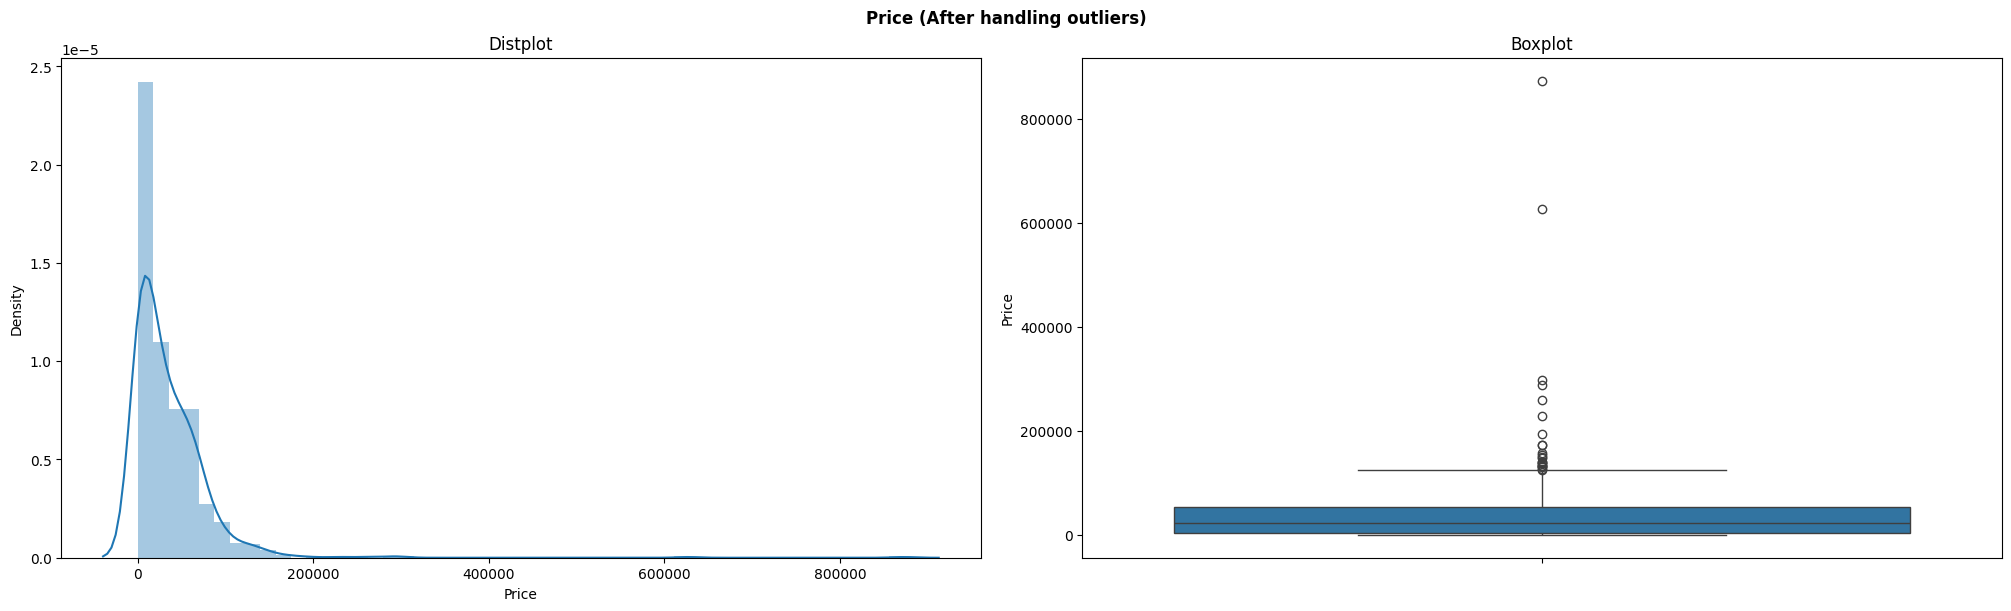

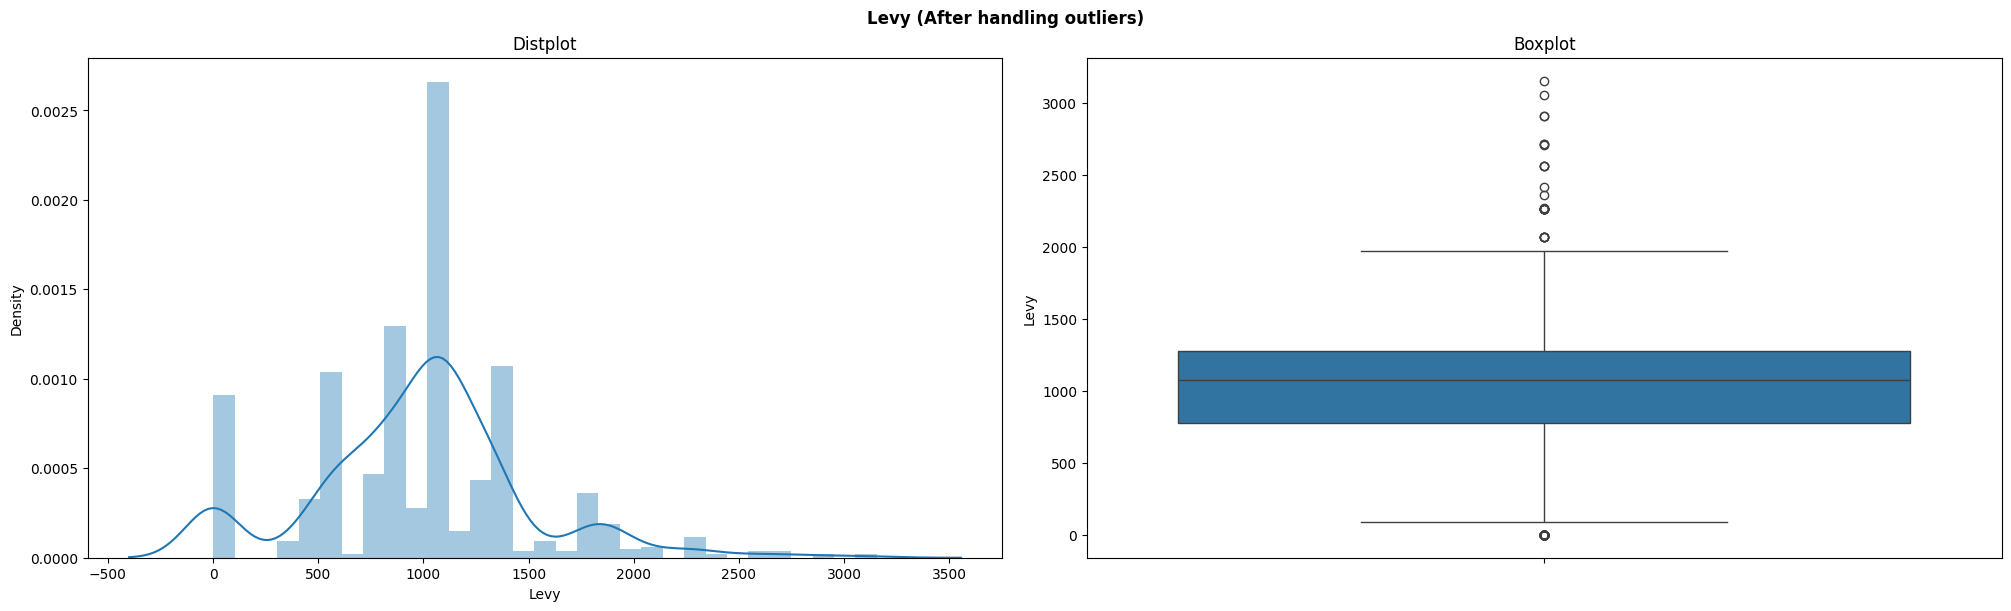

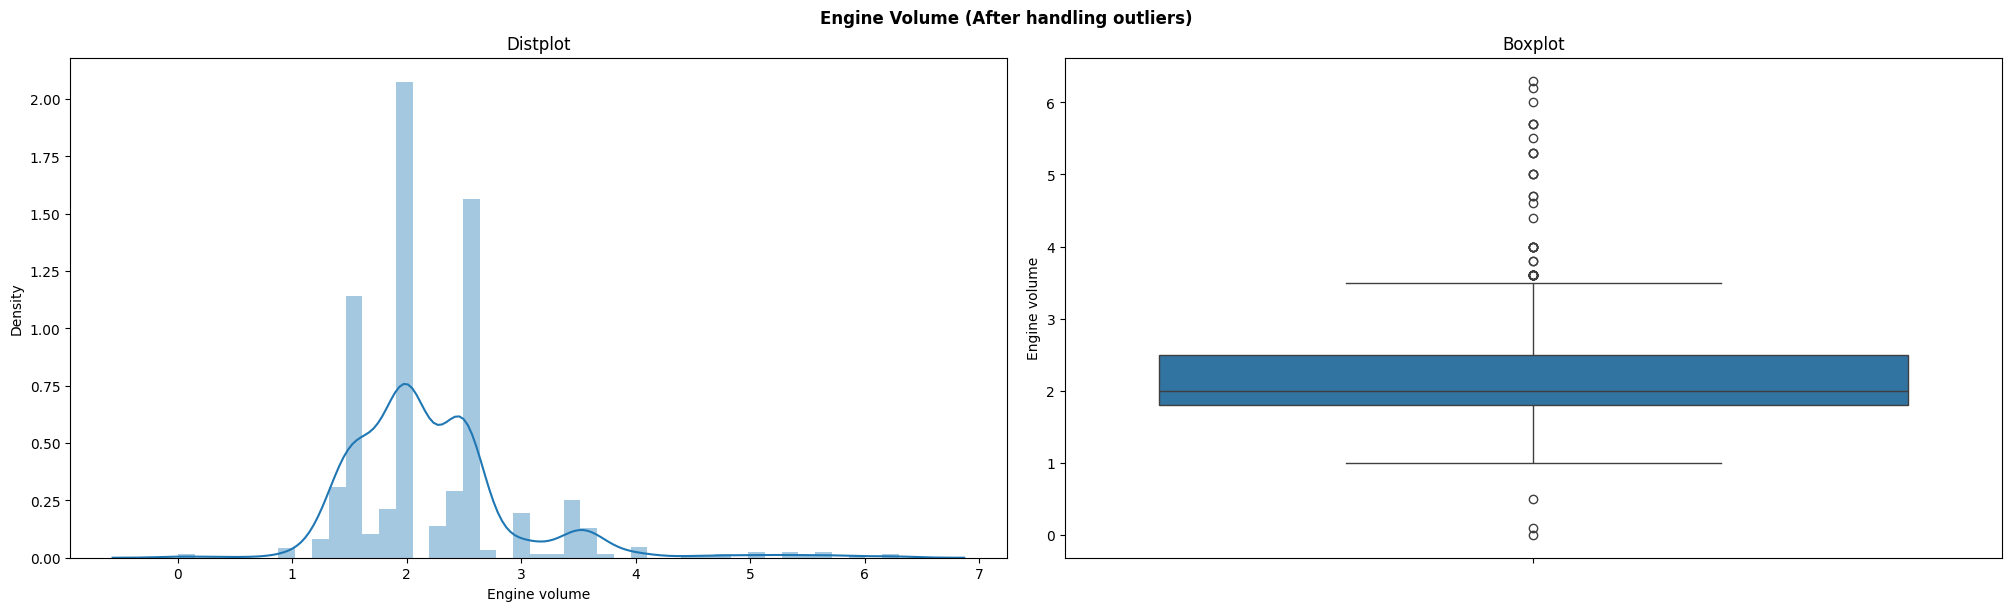

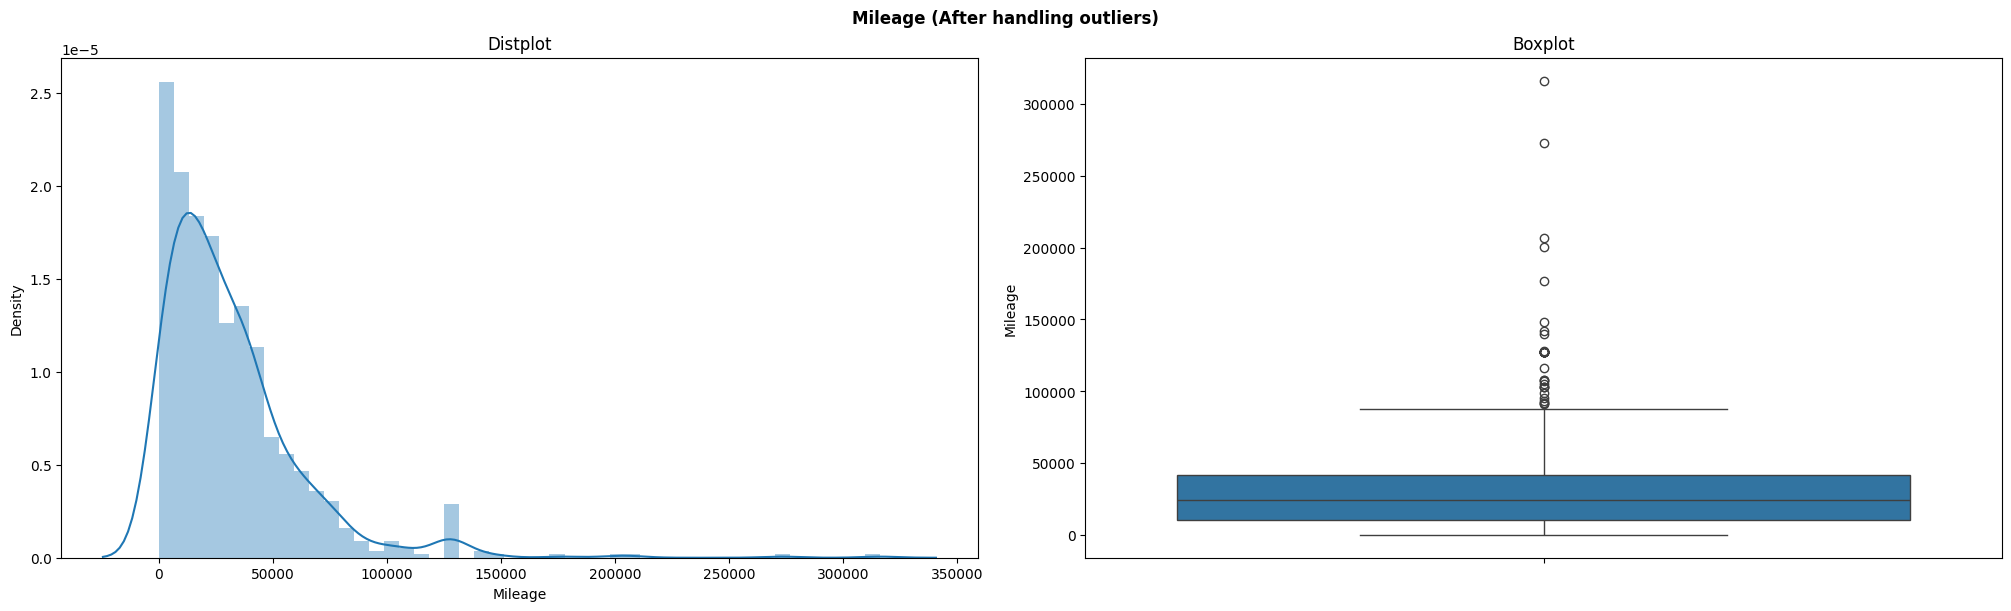

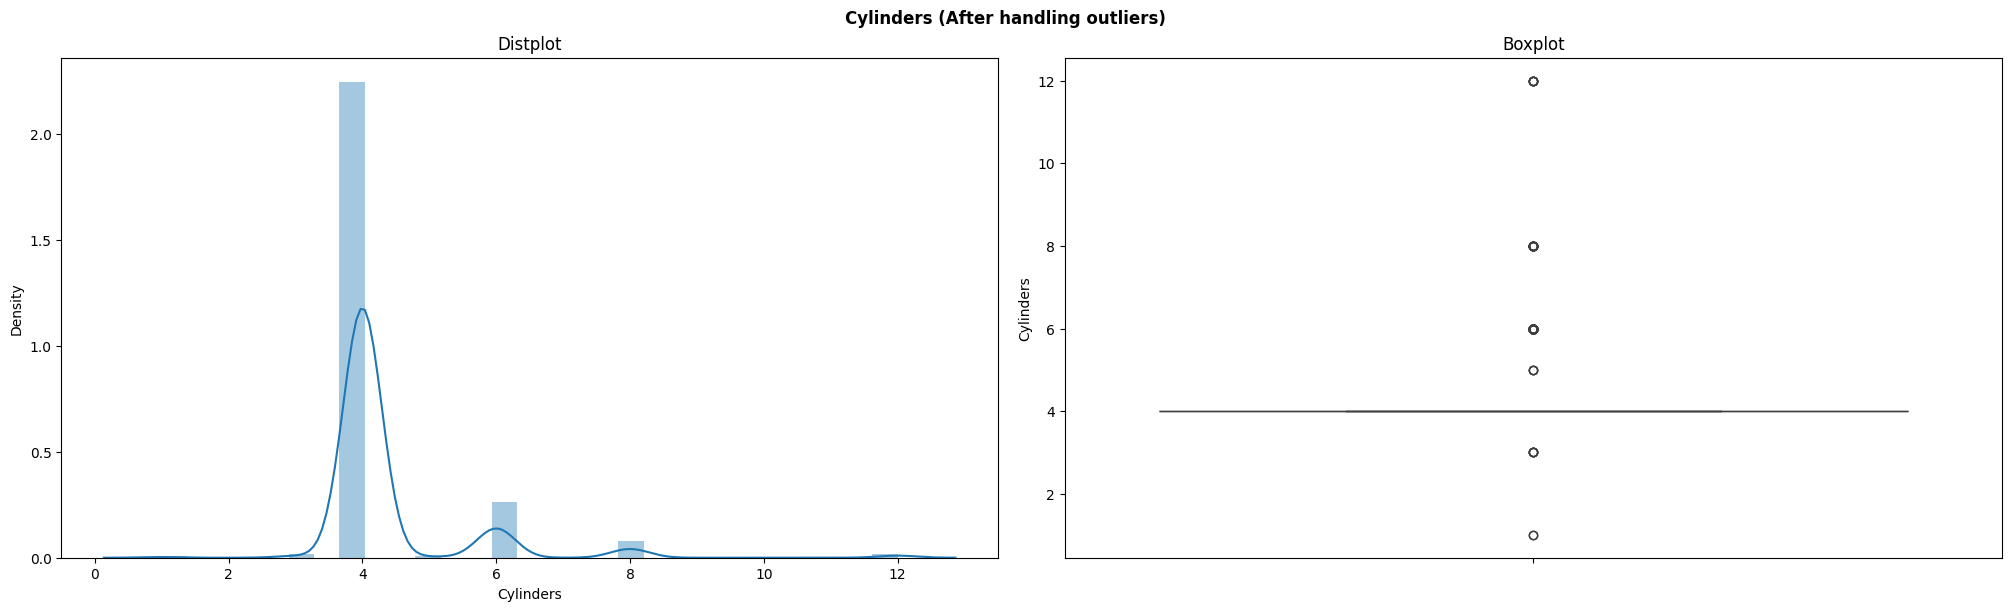

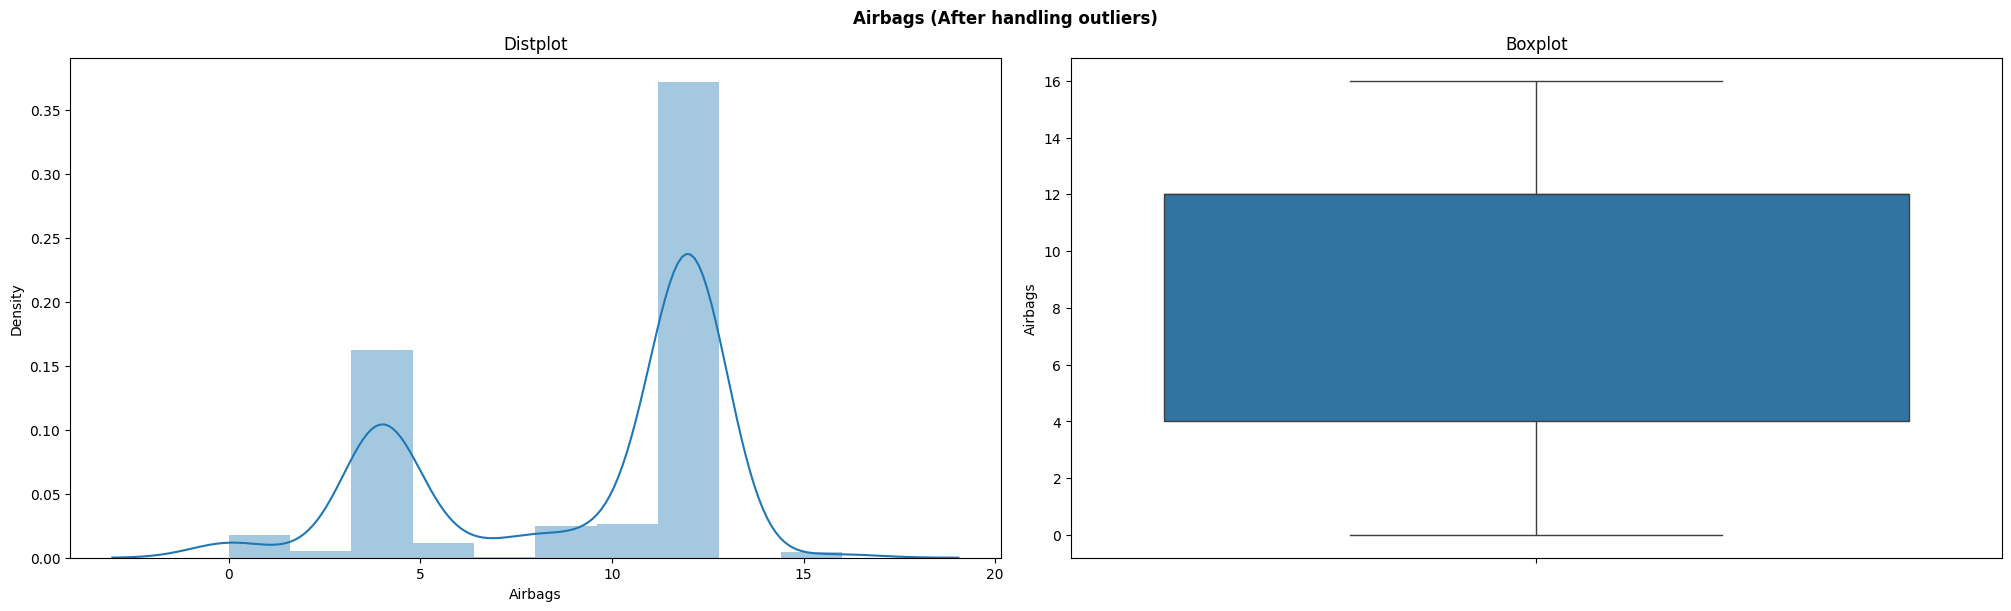

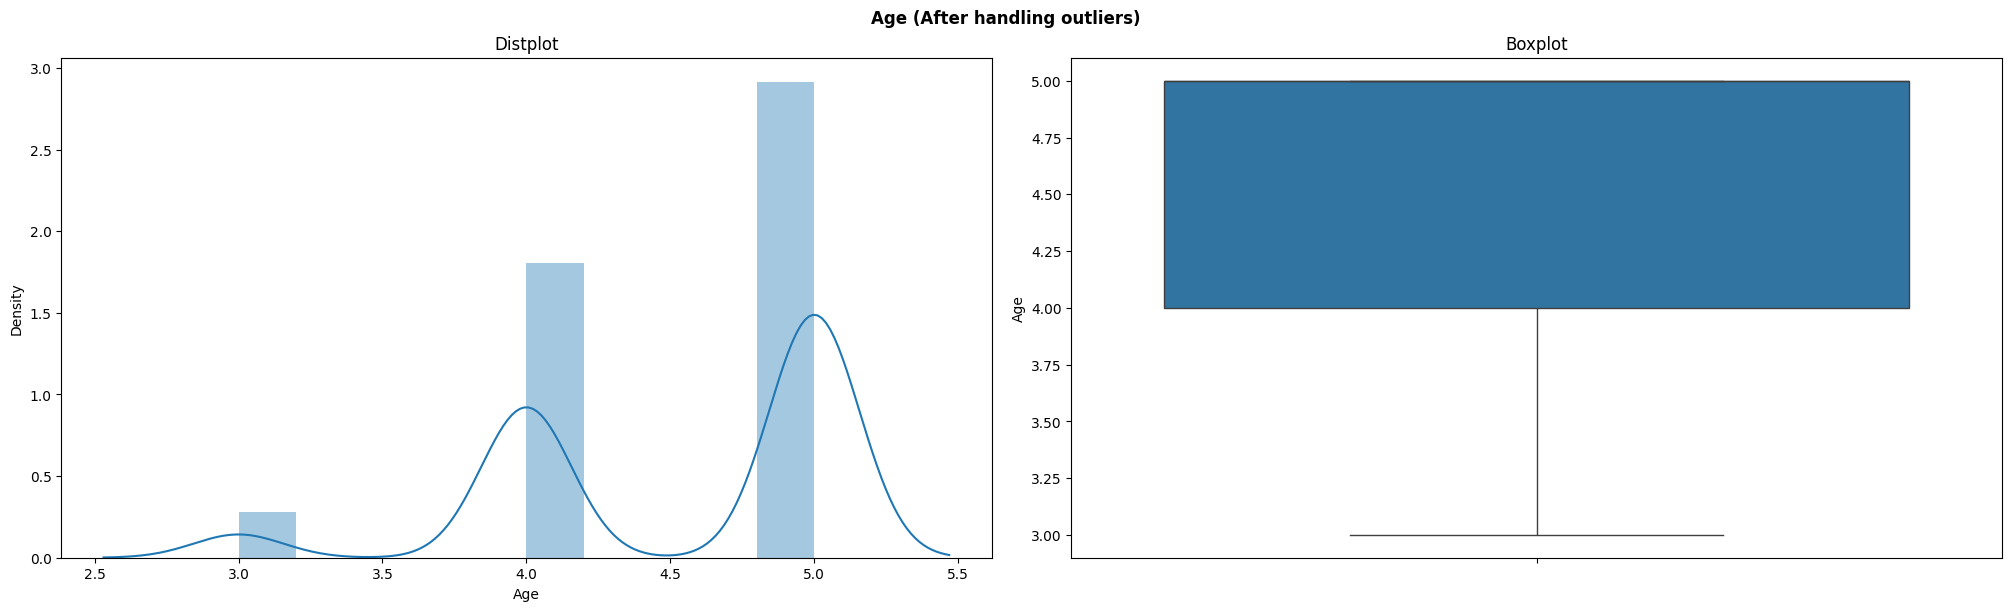

In [39]:
#Plotting Graphs After treating outliers of continous features
for col in numeric_data:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(data[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(data[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (After handling outliers)',weight='bold')
    fig.show()

# Transform Data

- Convert all object columns to numerical by labelencoder (Because ML Model don't understand object columns)

In [40]:
obdata = data.select_dtypes(include=object)
numdata = data.select_dtypes(exclude=object)

In [41]:
for i in range(0,obdata.shape[1]):
    obdata.iloc[:,i] = lab.fit_transform(obdata.iloc[:,i])  

In [42]:
data = pd.concat([obdata,numdata],axis=1)

In [43]:
data

,Manufacturer,Model,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Price,Levy,Engine volume,Mileage,Cylinders,Airbags,Age
15,30,23,3,1,3,0,1,0,14,549,1079.0,2.0,74146,4.0,12,5
36,30,24,3,0,3,2,1,0,11,51746,1077.0,2.0,10200,4.0,12,4
56,19,80,3,1,3,2,0,0,7,87112,0.0,2.0,5323,4.0,0,4
59,4,53,7,0,3,0,1,0,11,23521,781.0,1.4,22000,4.0,6,5
81,30,180,7,1,3,0,1,0,14,7527,830.0,1.5,27656,4.0,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19155,9,75,5,0,1,0,1,1,7,24000,2266.0,1.5,19000,4.0,0,5
19157,13,20,7,1,3,0,1,0,2,3607,1077.0,2.0,23474,4.0,12,4
19180,10,149,7,1,2,0,1,0,12,63886,1076.0,2.0,5305,4.0,4,3
19182,30,30,7,1,1,0,1,0,1,9722,609.0,2.5,127515,4.0,12,5


# Model

In [44]:
x= data.drop('Price',axis=1)
y= data['Price']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=5)

In [46]:
algorithm = ['LinearRegression','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingRegressor','SVR']
R2=[]
RMSE = []

In [47]:
def models(model):
    model.fit(x_train,y_train)
    pre = model.predict(x_test)
    r2 = r2_score(y_test,pre)
    rmse = np.sqrt(mean_squared_error(y_test,pre))
    R2.append(r2)
    RMSE.append(rmse)
    score = model.score(x_test,y_test)
    print(f'The Score of Model is :{score}')

In [48]:
model1 = LinearRegression()
model2 = DecisionTreeRegressor()
model3 = RandomForestRegressor()
model4 = GradientBoostingRegressor()
model5 = SVR()

In [49]:
models(model1)
models(model2)
models(model3)
models(model4)
models(model5)

The Score of Model is :0.4816273739553777
The Score of Model is :-1.1342593186484882


The Score of Model is :0.6493350907408459
The Score of Model is :0.5088212648103483
The Score of Model is :-0.061710947301625074


In [50]:
df = pd.DataFrame({'Algorithm':algorithm, 'R2_score': R2, 'RMSE':RMSE})
df

,Algorithm,R2_score,RMSE
0,LinearRegression,0.481627,25718.064560
1,DecisionTreeClassifier,-1.134259,52184.418164
2,RandomForestClassifier,0.649335,21152.582946
3,GradientBoostingRegressor,0.508821,25034.390982
4,SVR,-0.061711,36806.150715


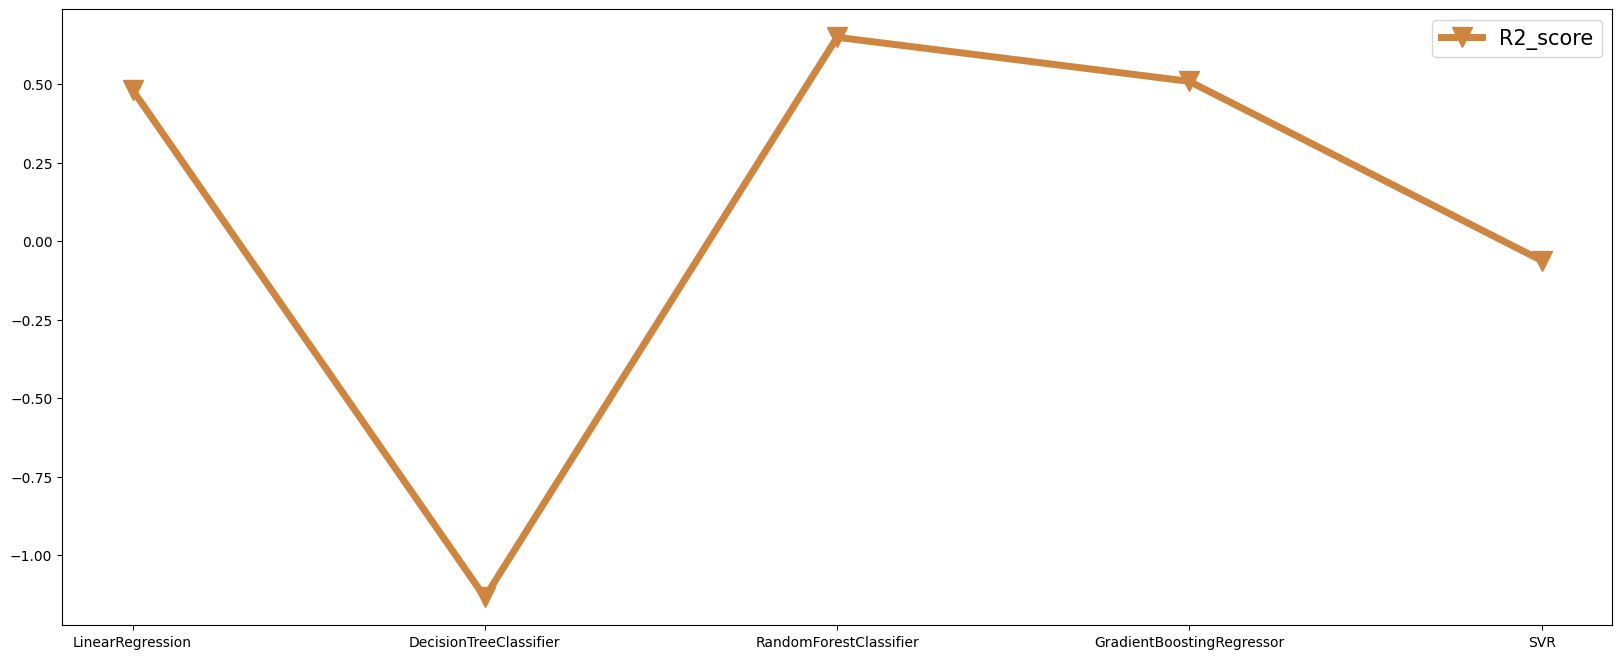

In [51]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.R2_score ,label='R2_score',lw=5,color='peru',marker='v',markersize = 15)
plt.legend(fontsize=15)
plt.show()

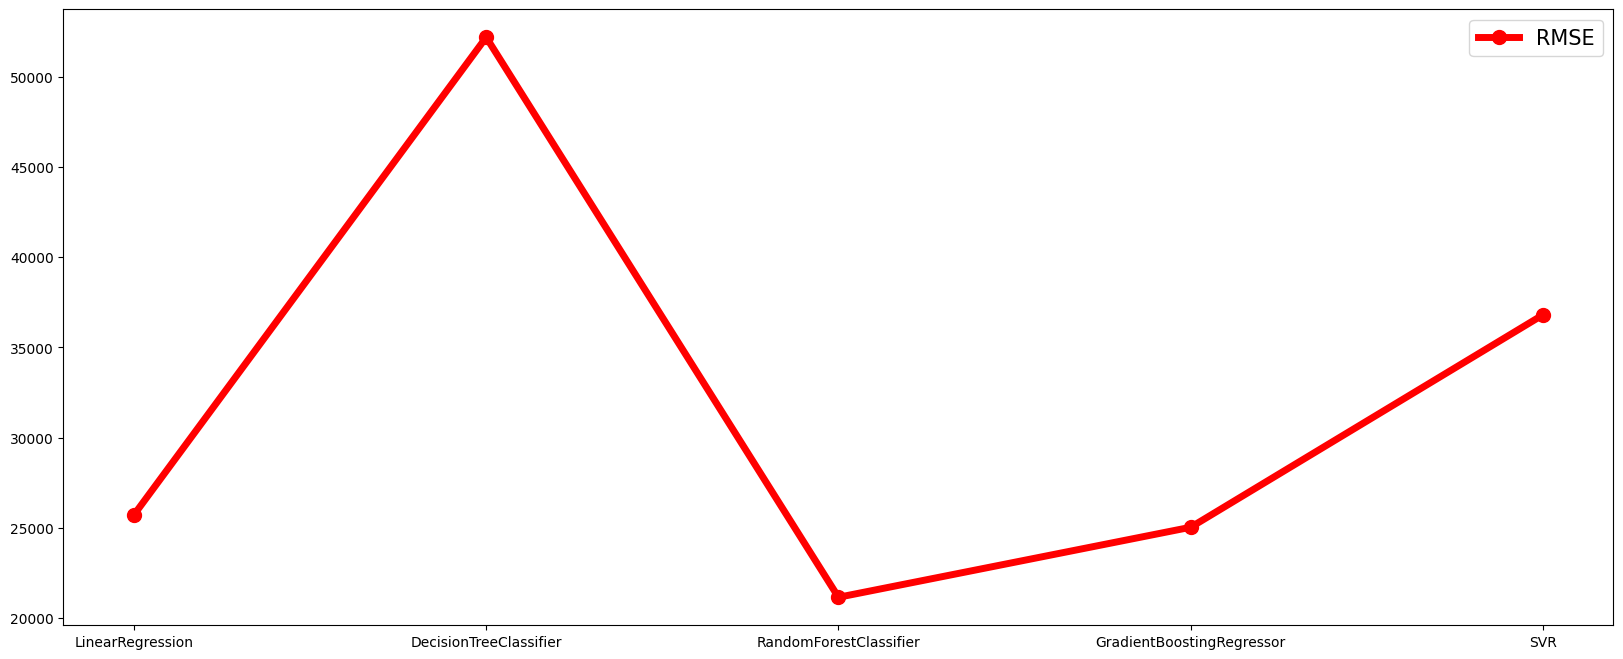

In [52]:
fig = plt.figure(figsize=(20,8))
plt.plot(df.Algorithm,df.RMSE ,label='RMSE',lw=5,color='r',marker='o',markersize = 10)
plt.legend(fontsize=15)
plt.show()